In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # For handling class imbalance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, ConfusionMatrixDisplay

# Model evaluation
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
  accuracy_score,
  confusion_matrix,
  classification_report,
  precision_score,
  recall_score,
  f1_score,
  roc_auc_score,
  roc_curve,
  precision_recall_curve,
  auc
)

In [ ]:
#Load the csv data
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

df.shape

(569, 33)

In [ ]:
print(df['diagnosis'].unique() )
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'diagnosis'.
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])
df['diagnosis'].unique()


['M' 'B']


array([1, 0])

In [ ]:
#Remove nan column unnamed32
df = df.drop(columns=["Unnamed: 32"])

#Check if there are any Nan
has_Nan = df.isna().any().any()  # Returns True if any NaN values are found

print("Any NaN values in the DataFrame:", has_Nan)

Any NaN values in the DataFrame: False


In [ ]:
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df.iloc[:, 2:])  # Exclude 'id' and 'diagnosis' columns from normalization
df_normalized = pd.DataFrame(normalized_data, columns=df.columns[2:])
df_normalized['diagnosis'] = df['diagnosis']


X= df_normalized.drop(columns=['diagnosis'])
y= df_normalized['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Accuracy: 0.9473684210526315
Confusion Matrix: [[70  5]
 [ 1 38]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.88      0.97      0.93        39

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



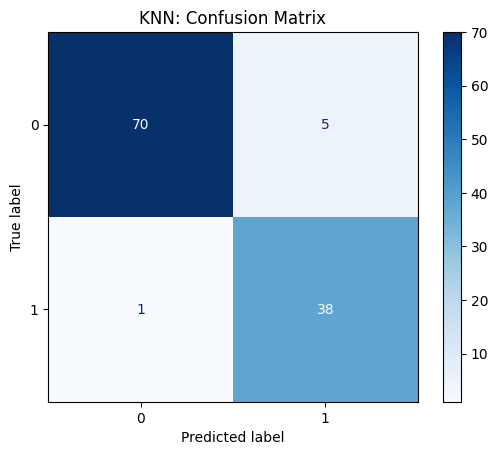

In [ ]:
#KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

classification = classification_report(y_test, y_pred)
print("Classification Report:", classification)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("KNN: Confusion Matrix")
plt.show()

Initial Model Accuracy: 0.9122807017543859
Initial Confusion Matrix:
 [[69  6]
 [ 4 35]]
Initial Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        75
           1       0.85      0.90      0.88        39

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.91      0.91       114

Feature importance analysis
Feature Importances:
                     Feature  Importance
23               area_worst    0.705124
27     concave points_worst    0.142859
1              texture_mean    0.059198
25        compactness_worst    0.019222
14            smoothness_se    0.018714
20             radius_worst    0.011192
21            texture_worst    0.009290
8             symmetry_mean    0.007994
9    fractal_dimension_mean    0.007994
7       concave points_mean    0.006995
12             perimeter_se    0.006218
10                radi

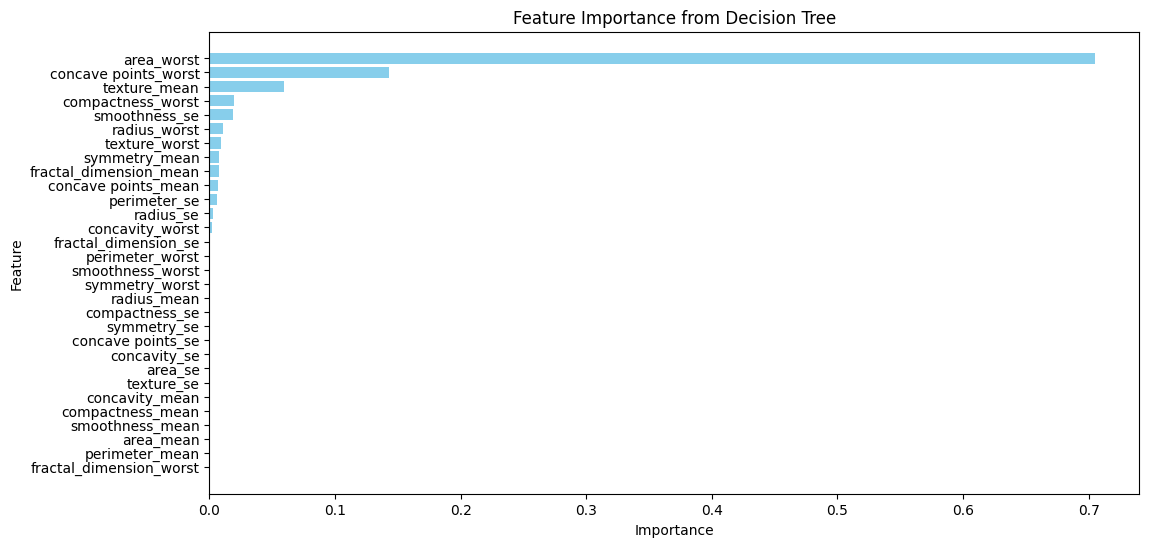

Hyperparameter tuning
Initial Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy after tuning: 0.9122807017543859
Confusion Matrix:
 [[68  7]
 [ 3 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        75
           1       0.84      0.92      0.88        39

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.92      0.91      0.91       114

Cross validation
Cross-Validation Accuracy Mean: 0.9191429902189101
Cross-Validation Accuracy Std Dev: 0.02448228425072479
Class Distribution in Training Data:
 diagnosis
0    282
1    173
Name: count, dtype: int64


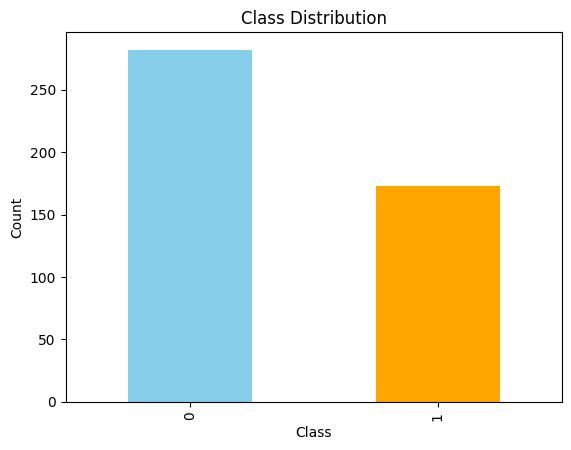

Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        75
           1       0.84      0.95      0.89        39

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114

Confusion Matrix after SMOTE:
[[68  7]
 [ 2 37]]


<ipython-input-2-3dba1e2ed008>:183: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='red')  # Random guess line


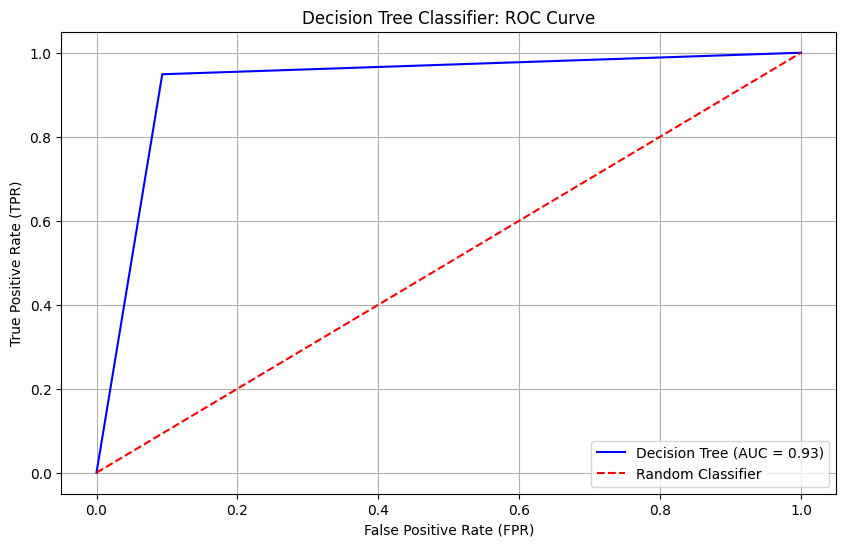


ROC-AUC Score: 0.9276923076923077
Precision-Recall AUC: 0.9035854496380812


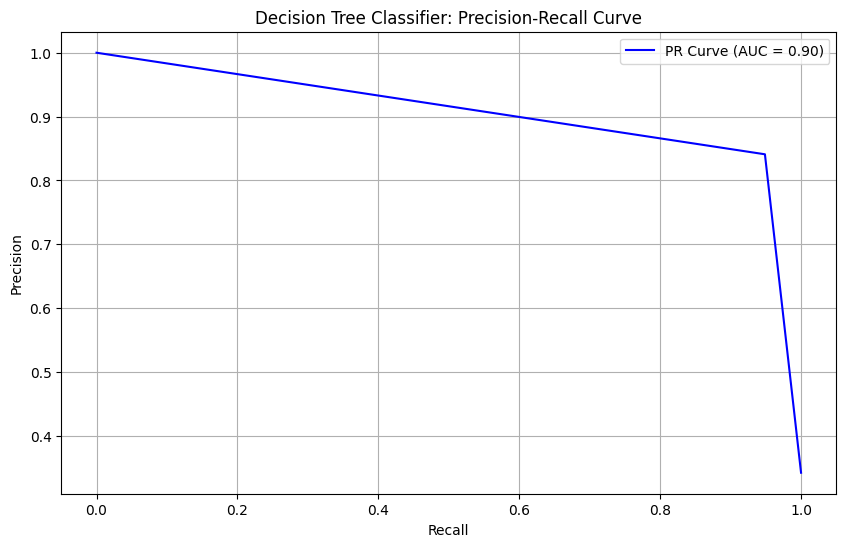

Initial Model Accuracy: 0.9122807017543859
Initial Confusion Matrix:
 [[69  6]
 [ 4 35]]


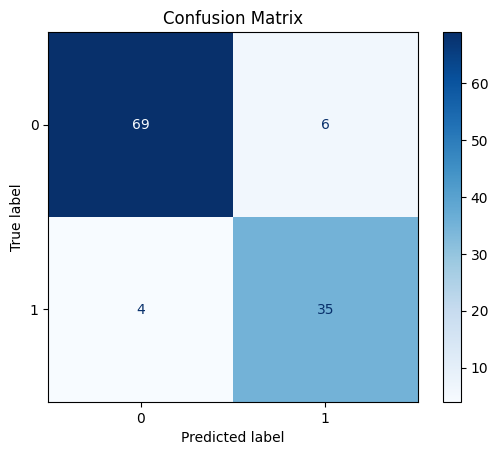

Initial Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        75
           1       0.85      0.90      0.88        39

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.91      0.91       114

Feature importance analysis
Feature Importances:
                     Feature  Importance
23               area_worst    0.705124
27     concave points_worst    0.142859
1              texture_mean    0.059198
25        compactness_worst    0.019222
14            smoothness_se    0.018714
20             radius_worst    0.011192
21            texture_worst    0.009290
8             symmetry_mean    0.007994
9    fractal_dimension_mean    0.007994
7       concave points_mean    0.006995
12             perimeter_se    0.006218
10                radius_se    0.002935
26          concavity_worst    0.002265
19     fractal_dimension_se    

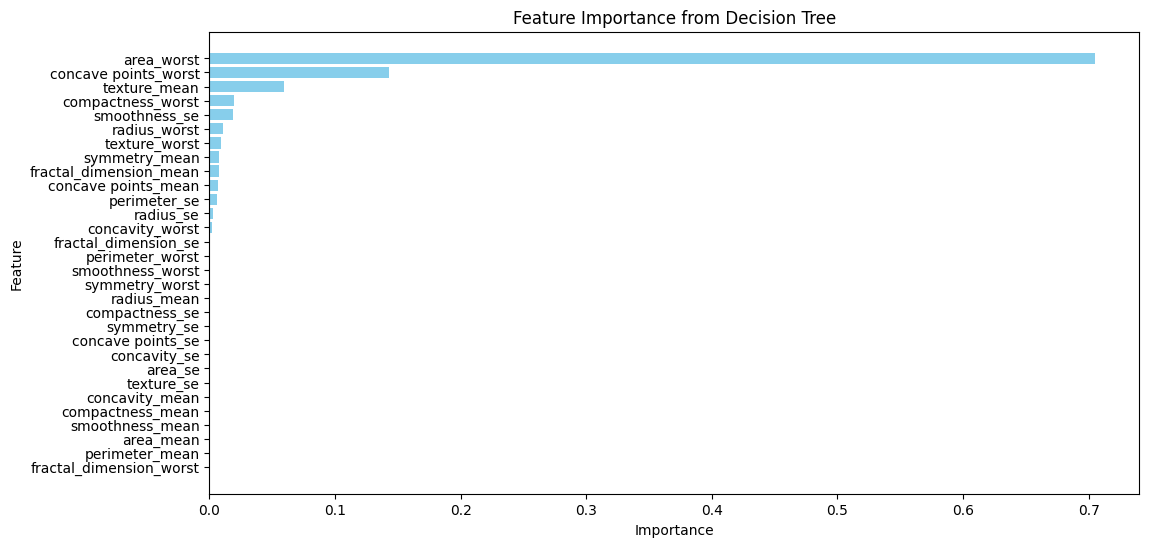

Hyperparameter tuning
Initial Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy after tuning: 0.9122807017543859
Confusion Matrix:
 [[68  7]
 [ 3 36]]


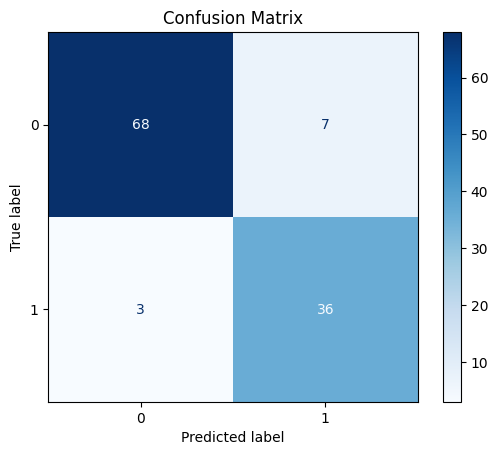

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        75
           1       0.84      0.92      0.88        39

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.92      0.91      0.91       114

Cross validation
Cross-Validation Accuracy Mean: 0.9191429902189101
Cross-Validation Accuracy Std Dev: 0.02448228425072479
Class Distribution in Training Data:
 diagnosis
0    282
1    173
Name: count, dtype: int64


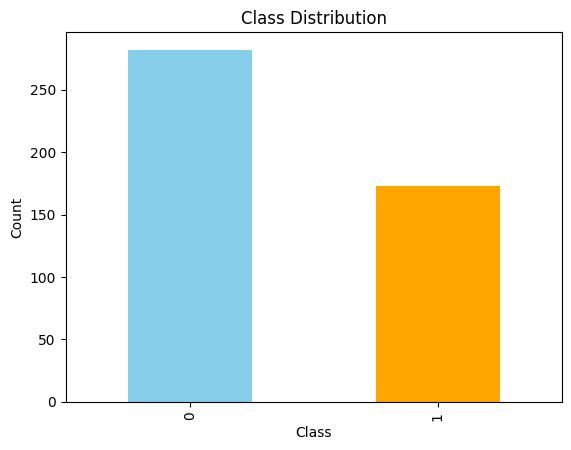

Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        75
           1       0.84      0.95      0.89        39

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114

Confusion Matrix after SMOTE:
[[68  7]
 [ 2 37]]


<ipython-input-24-4b0065810245>:116: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='red')


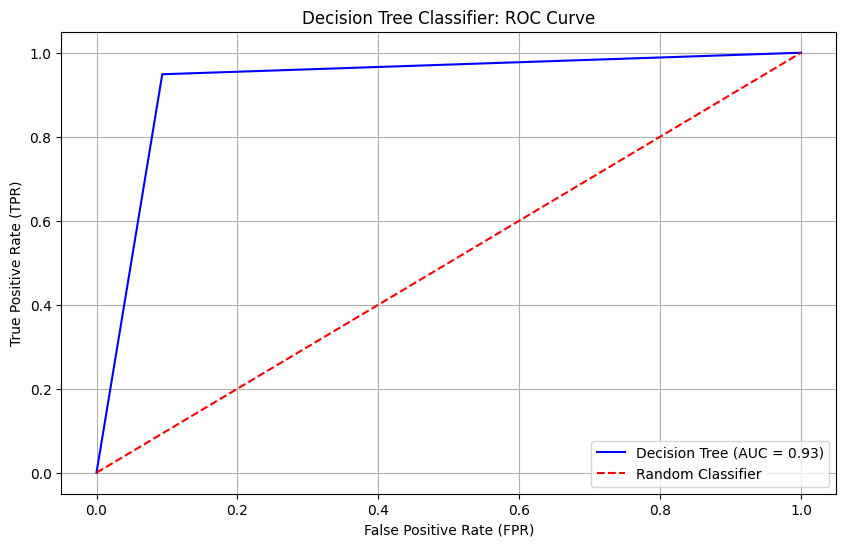


ROC-AUC Score: 0.9276923076923077
Precision-Recall AUC: 0.9035854496380812


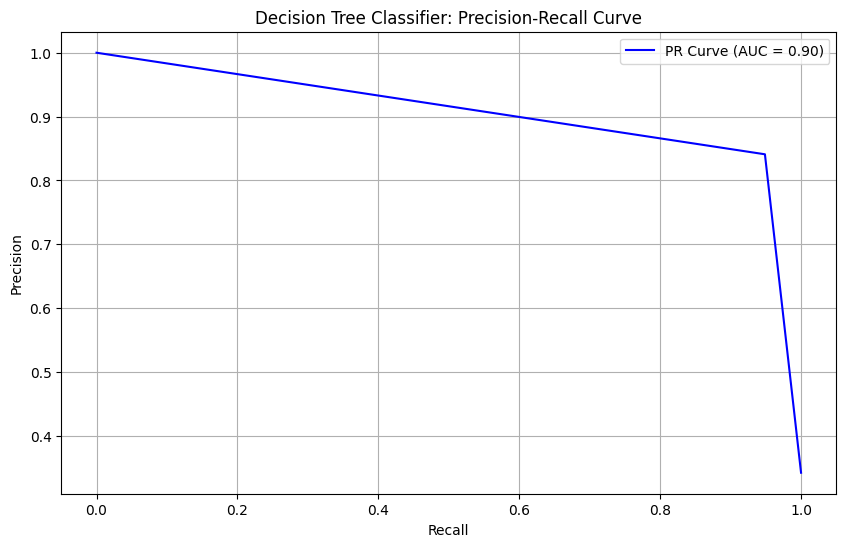

In [ ]:
#Decision Tree

decision_tree_classifier(X_train, X_test, y_train, y_test)

# first: train and evaluate model
decision_tree = DecisionTreeClassifier(random_state=50)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
print("Initial Model Accuracy:", accuracy_dt)

cm = confusion_matrix(y_test, y_pred)
print("Initial Confusion Matrix:\n", cm)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

classification = classification_report(y_test, y_pred)
print("Initial Classification Report:\n", classification)

# Feature importance analysis
print("Feature importance analysis")
feature_importances = decision_tree.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

#feature importance plot
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# Second: Initial hyperparameter tuning
print("Hyperparameter tuning")
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=50), param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Best parameters
best_params = grid_search.best_params_
print("Initial Best Parameters:", best_params)

#implementing the best parameters
decision_tree = DecisionTreeClassifier(**best_params, random_state=50)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy after tuning:", accuracy_dt)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

classification = classification_report(y_test, y_pred)
print("Classification Report:\n", classification)

# Three: Cross-validation  because I am getting the same accuracy
print("Cross validation")
cv_scores = cross_val_score(decision_tree, pd.concat([X_train, X_test]), pd.concat([y_train, y_test]), cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Mean:", cv_scores.mean())
print("Cross-Validation Accuracy Std Dev:", cv_scores.std())

# Four: checking for data imbalanced to see if this is the reason for the accuracy
class_counts = y_train.value_counts()
print("Class Distribution in Training Data:\n", class_counts)

# Plot class distribution
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

smote = SMOTE(random_state=50) #imbalance data check
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

decision_tree = DecisionTreeClassifier(random_state=50)
decision_tree.fit(X_resampled, y_resampled)
y_pred = decision_tree.predict(X_test)

print("Classification Report after SMOTE:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix after SMOTE:")
print(confusion_matrix(y_test, y_pred))

# Five: ROC-AUC and precision recall
y_prob = decision_tree.predict_proba(X_test)[:, 1]  # Probability for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='red')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Decision Tree Classifier: ROC Curve')
plt.legend()
plt.grid()
plt.show()

print("\nROC-AUC Score:", roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})", color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Classifier: Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

#no accuracy improvement despite the hyperparameter tuning

Initial Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.97      0.97      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



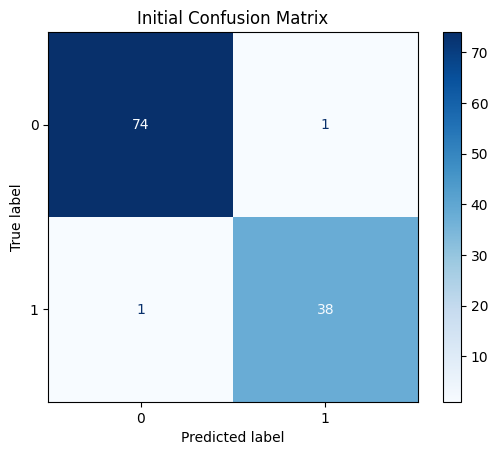

Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Updated Accuracy: 0.9912280701754386


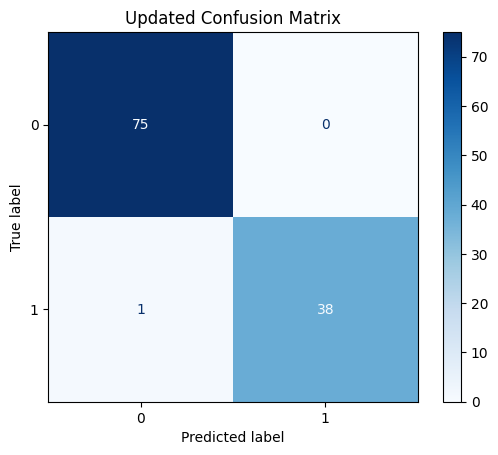

Cross-Validation Accuracy Mean: 0.9802197802197803
Cross-Validation Accuracy Std Dev: 0.014578570507056694


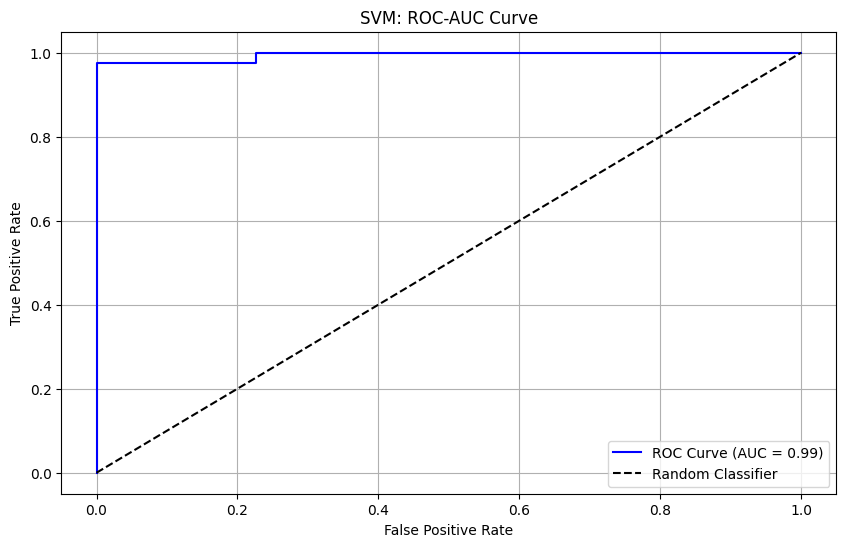


ROC-AUC Score: 0.9941880341880341


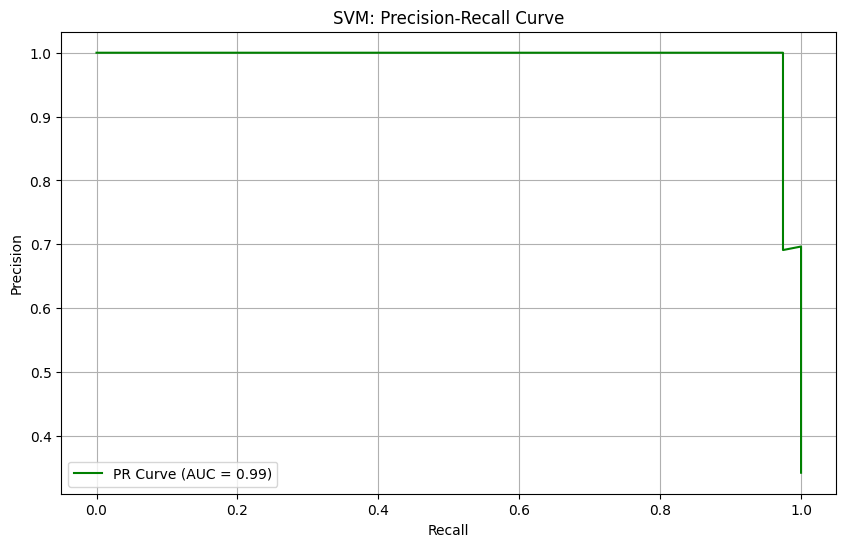


Precision-Recall AUC: 0.9921453546453547


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Initialize SVM classifier with probability=True
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Initial prediction and accuracy
y_pred = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print("Initial Accuracy:", accuracy_svm)

classification = classification_report(y_test, y_pred)
print("Classification Report:\n", classification)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Grid Search to improve accuracy
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Used only for 'poly' kernel
}

# Include probability=True in GridSearchCV to ensure models support predict_proba
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Update the SVM classifier with the best parameters and probability=True
svm = SVC(**best_params, probability=True)
svm.fit(X_train, y_train)

# Updated prediction and accuracy
y_pred = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print("Updated Accuracy:", accuracy_svm)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Updated Confusion Matrix")
plt.show()

# Cross-validation to check generalization
cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Mean:", cv_scores.mean())
print("Cross-Validation Accuracy Std Dev:", cv_scores.std())

# ROC-AUC Curve
y_prob = svm.predict_proba(X_test)[:, 1]  # Probability for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM: ROC-AUC Curve')
plt.legend()
plt.grid()
plt.show()

print("\nROC-AUC Score:", roc_auc)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})", color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM: Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

print("\nPrecision-Recall AUC:", pr_auc)



Accuracy: 0.9824561403508771
Precision: 0.9743589743589743
Recall: 0.9743589743589743
F1 Score: 0.9743589743589743

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.97      0.97      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<ipython-input-23-ba2cc458779e>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='red')  # Random guess line


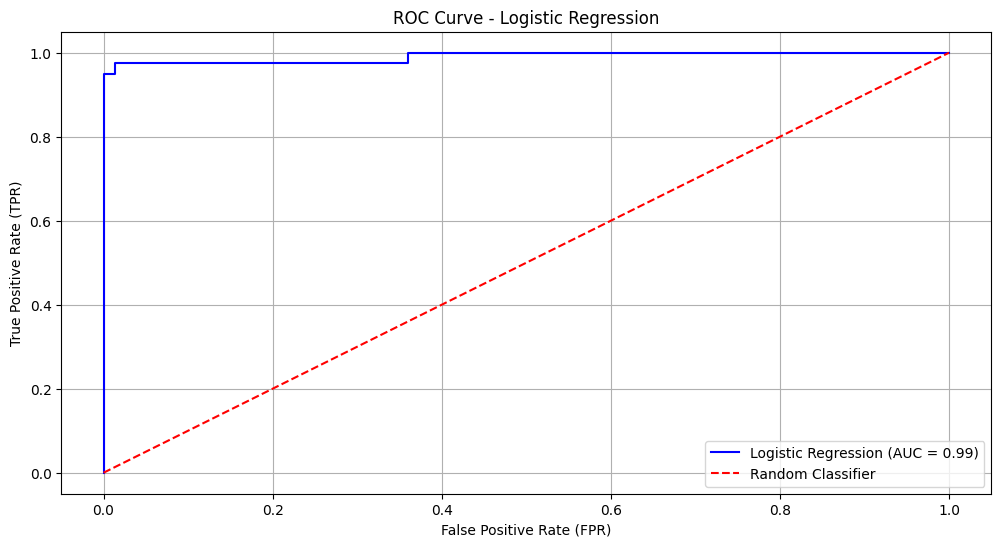


ROC-AUC Score: 0.9904273504273504


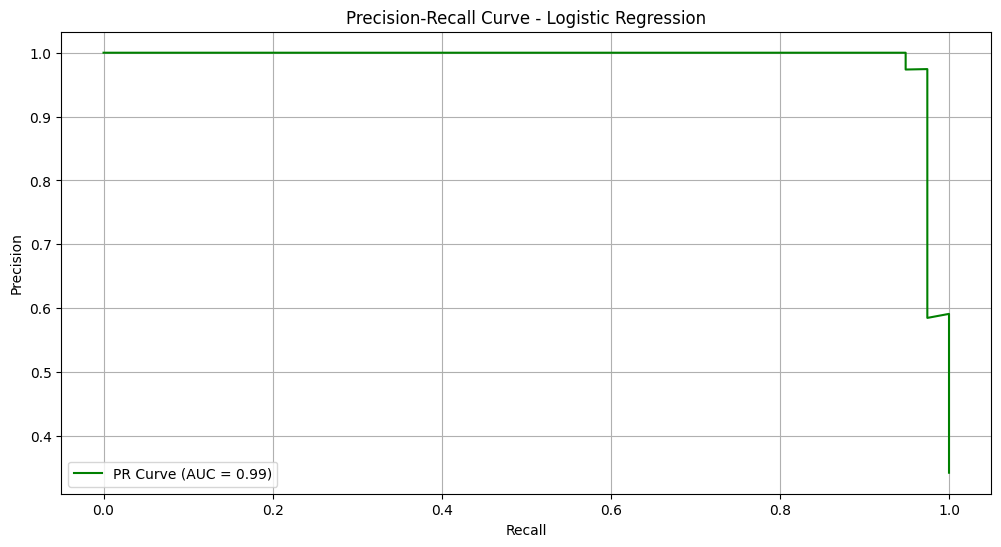

In [ ]:
#Logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

  # Calculate probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Plot ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', color='red')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()

print("\nROC-AUC Score:", roc_auc)

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(12, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})", color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()


